<a href="https://colab.research.google.com/github/abhinav260/ML/blob/master/Assignment_4/Assignment_4(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('Real_estate_data.csv')
x = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

In [0]:
y = y.reshape(len(y),1)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = sc_y.inverse_transform(regressor.predict(x_test))
x_test = sc_x.inverse_transform(x_test)
y_test = sc_y.inverse_transform(y_test)

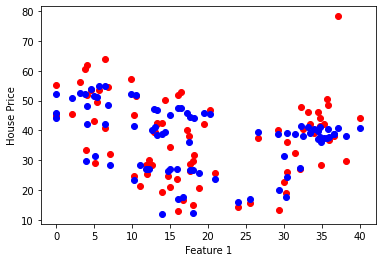

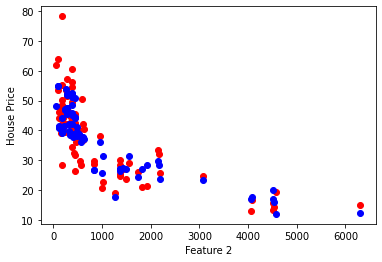

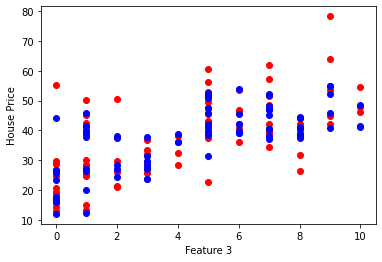

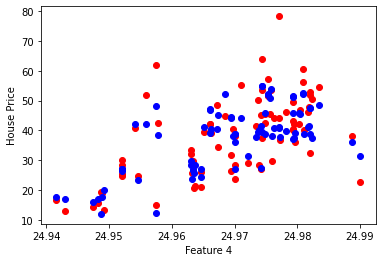

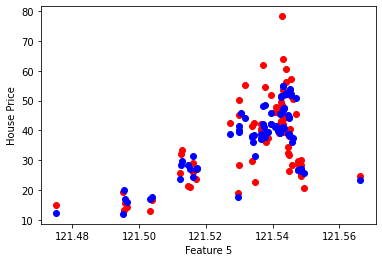

In [8]:
for i in range(5):
  plt.figure()
  plt.scatter(x_test[:,i], y_test, color='red')
  plt.scatter(x_test[:,i], y_pred, color='blue')
  plt.xlabel('Feature '+ str(i+1))
  plt.ylabel('House Price')
plt.show()

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.703006630191835